# SHAP Values for Additive Model

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# SHAP
import shap

# Tabulate
from tabulate import tabulate

# Scikit-Learn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Interpret
from interpret.glassbox import ExplainableBoostingRegressor

#### Retreiving Data

In [4]:
wine = pd.read_csv('/Users/joaquinromero/Desktop/SHAP/chap_09/wine.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Target
y = wine['quality']

# Features
X = wine.drop('quality', axis=1)

In [8]:
# Splitting Prodecure
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [9]:
# Placing Model
model = ExplainableBoostingRegressor(interactions=0)

# Fitting Model
model.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

In [10]:
# Prediction
y_pred = model.predict(X_test)

# Mean Aboslute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae: .2f}")

MAE:  0.55


### Interpredring The GAM with SHAP

In [11]:
explainer = shap.Explainer(model.predict, X_train)

shap_values = explainer(X_test)

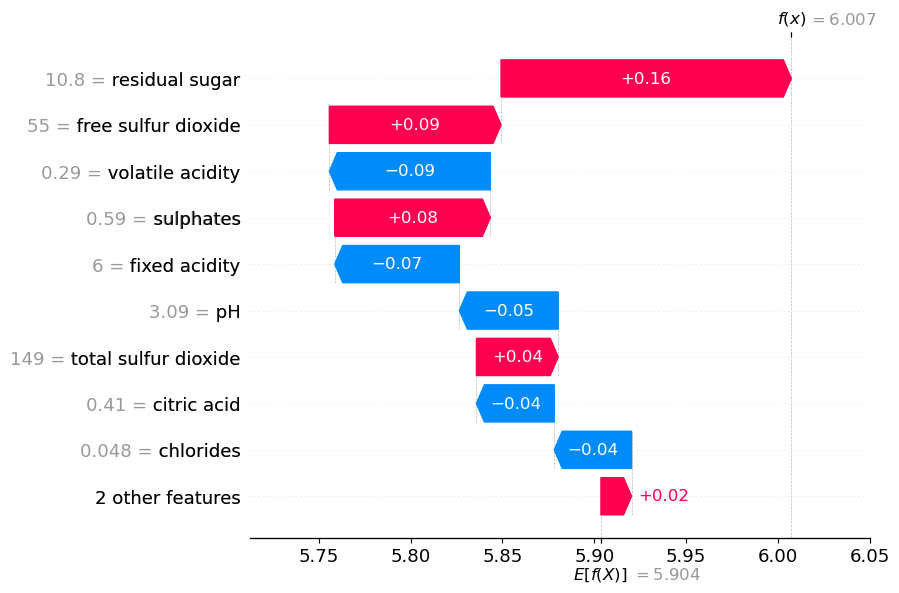

In [12]:
shap.plots.waterfall(shap_values[0], max_display=10)

### SHAP Recovers Non-Linear Functions

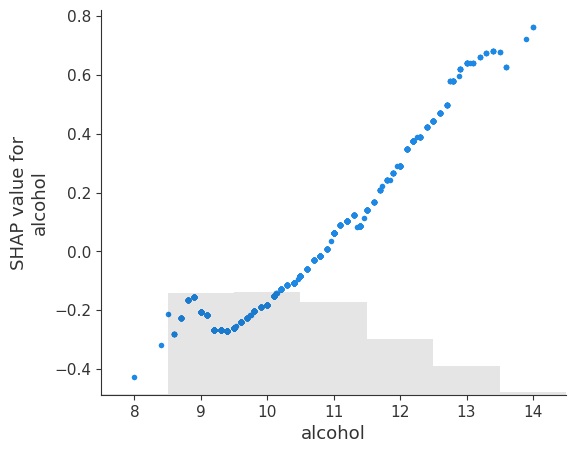

In [19]:
shap.plots.scatter(shap_values[:, "alcohol"])
plt.show()

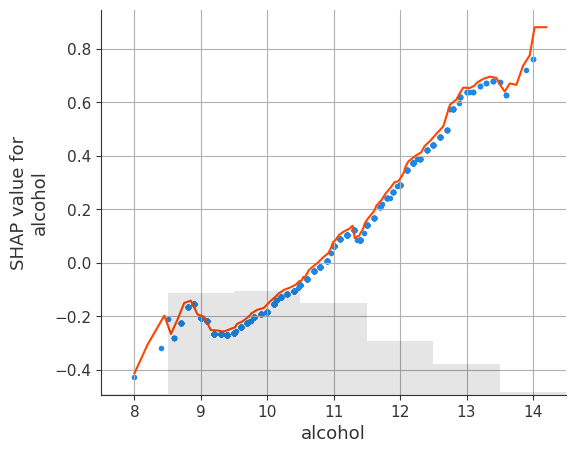

In [20]:
shap.plots.scatter(shap_values[:, "alcohol"], show=False)

# 1st Getting Alcohol Index
idx = model.explain_global().data()['names'].index('alcohol')

# Tree-Base GAM Relevant Data
explain_data = model.explain_global().data(idx)

x_data = explain_data["names"]
y_data = explain_data["scores"]
y_data = np.r_[y_data, y_data[np.newaxis, -1]]
plt.plot(x_data, y_data, color='orangered')
plt.grid()
plt.show()

### Analyzing Feature Importance

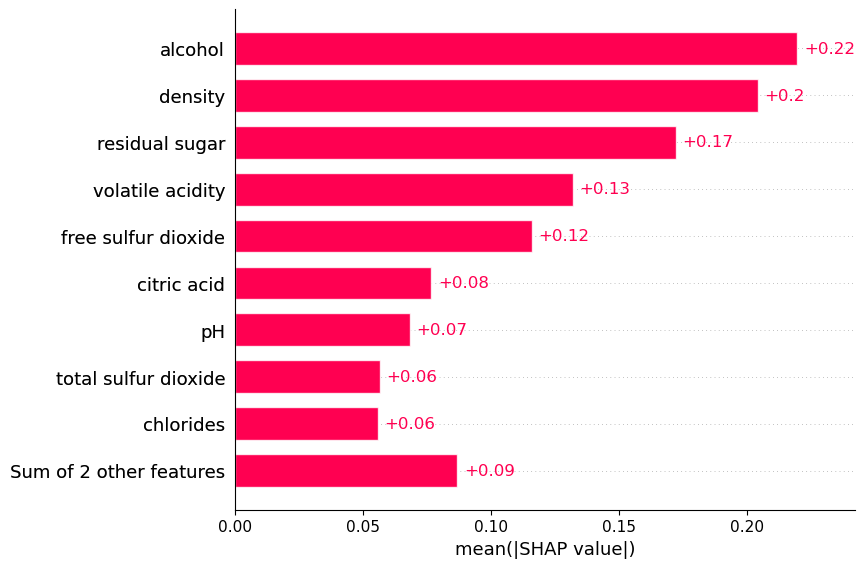

In [21]:
shap.plots.bar(shap_values)